### Credit Card Transactions Fraud Detection Dataset

##### About Data Set:

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 30th June 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

We are going to work on Fraud_Test dataset (as Fraud train dataset is already huge) and will build a model to detect credit card frauds which saves a lot of money and be less risk for banks.

In [2]:
#Importing the Required Librarires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [3]:
# We are using Fraud_test dataset as a whole and dropping 1st column 'Unnamed' as it was irrelevant

df = pd.read_csv('D:\mini\fraudTrain.csv')
df = df.drop(df.columns[0], axis=1)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### Inspecting Data 

In [ ]:
df[''.value_counts

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [4]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [5]:
#Checking null values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#### No Null values in our data

In [5]:
df.shape

(555719, 22)

### Distribution of Dependent Variable

In [4]:
df['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [6]:
df['is_fraud'].value_counts(normalize=True)*100

0    99.614014
1     0.385986
Name: is_fraud, dtype: float64

This is highly imbalanced class data, so later we need to balance the dependent variable

In [8]:
#Finding unique values in each column
df.nunique()

trans_date_trans_time    544760
cc_num                      924
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

### Converting data type of trans_date_trans_time to datetime

In [9]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [8]:
df.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

### Deriving 'Transaction Hour' Feature from 'Transaction Time' Feature

In [10]:
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_hour']

0         12
1         12
2         12
3         12
4         12
          ..
555714    23
555715    23
555716    23
555717    23
555718    23
Name: trans_hour, Length: 555719, dtype: int64

### Deriving 'Day of Week' Feature from 'Transaction Time' Feature

In [11]:
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week']

0           Sunday
1           Sunday
2           Sunday
3           Sunday
4           Sunday
            ...   
555714    Thursday
555715    Thursday
555716    Thursday
555717    Thursday
555718    Thursday
Name: day_of_week, Length: 555719, dtype: object

In [13]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,Sunday
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,Sunday
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,Sunday
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,Sunday
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12,Sunday


### Deriving 'Year Month' Feature from 'Transaction Time' Feature


In [12]:
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['year_month']

0         2020-06
1         2020-06
2         2020-06
3         2020-06
4         2020-06
           ...   
555714    2020-12
555715    2020-12
555716    2020-12
555717    2020-12
555718    2020-12
Name: year_month, Length: 555719, dtype: period[M]

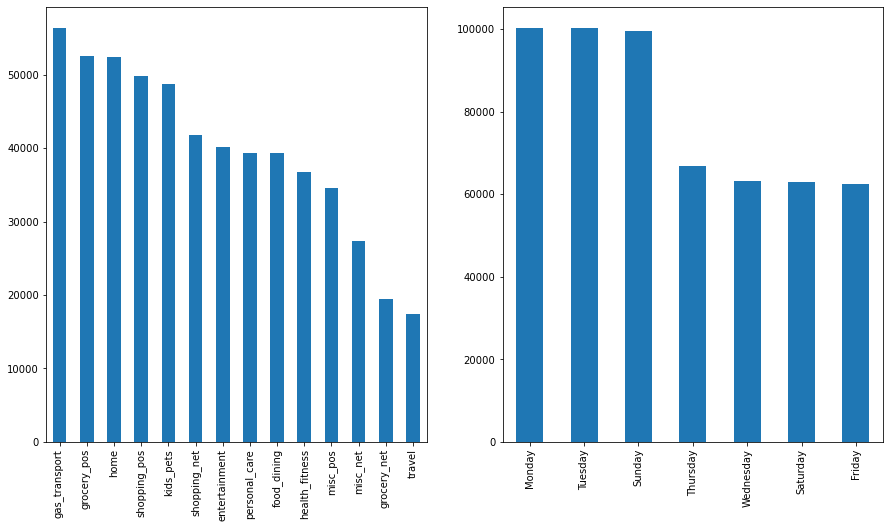

In [13]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['day_of_week'].value_counts().plot.bar();


- Monday and Tuesday of the week have highest credit card transactions
- gas_transport and grocery_pos have highest credit card transactions

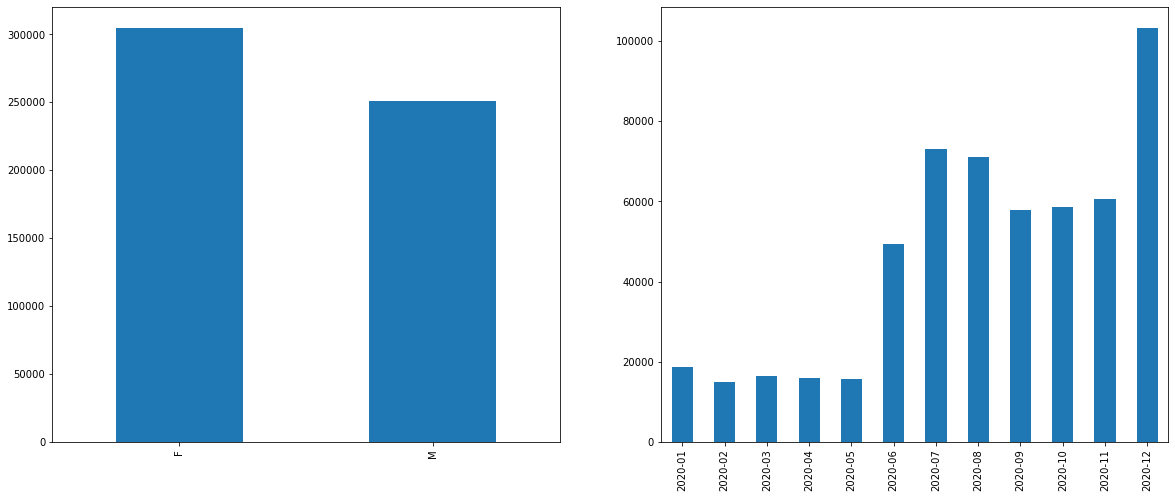

In [14]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['year_month'].value_counts().plot.bar();


- Highest number of Transactions are in month of December and Lowest number of Transactions happened in June 

### Derive Age of the Customer: 

Age of Customer = Transaction Date - DOB

In [15]:
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))
df['age'].describe()

count    555719.000000
mean         46.797934
std          17.433413
min          15.000000
25%          33.000000
50%          45.000000
75%          58.000000
max          96.000000
Name: age, dtype: float64

In [16]:
## 33-58 aged people are 50% of our customers

print("Minimum age of customer is", df['age'].min())
print("Maximum age of customer is", df['age'].max())

Minimum age of customer is 15.0
Maximum age of customer is 96.0


### Deriving counts for each state and Job category

In [19]:
df.state.value_counts()

TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
MN    13719
AR    13484
NC    12868
SC    12541
VA    12506
KY    12506
WI    12370
IN    11959
IA    11819
OK    11379
GA    11277
MD    11152
WV    10838
NJ    10528
NE    10257
KS     9943
LA     8988
MS     8833
WY     8454
WA     8116
OR     7811
TN     7359
NM     7020
ME     6928
ND     6397
CO     5886
SD     5250
MA     5186
MT     5052
VT     5044
UT     4658
AZ     4592
NH     3449
CT     3277
ID     2490
NV     2451
DC     1517
HI     1090
AK      843
RI      195
Name: state, dtype: int64

In [20]:
df.job.value_counts()

Film/video editor                4119
Exhibition designer              3968
Surveyor, land/geomatics         3756
Naval architect                  3750
Designer, ceramics/pottery       3463
                                 ... 
Merchandiser, retail              195
Engineer, civil (consulting)      194
Operational investment banker      11
Software engineer                  11
Engineer, water                     8
Name: job, Length: 478, dtype: int64

##### Distribution of amt

In [17]:
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amount Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amount Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amount Distribution'})],
axis=1
)

,Row Type,Overall Amount Distribution,Non Fraud Amount Distribution,Fraud Amount Distribution
0,count,555719.000000,553574.000000,2145.000000
1,mean,69.392810,67.614408,528.356494
2,std,156.745941,152.471931,392.747594
3,min,1.000000,1.000000,1.780000
4,50%,47.290000,47.150000,371.940000
5,95%,193.051000,188.870000,1084.108000
6,99.9%,1572.723500,1575.960200,1311.443760
7,max,22768.110000,22768.110000,1320.920000


Fraud Transaction mean is way higher than non-fraud transaction

Mean of Non Fraud Transactions: 67.6

Mean of Fraud Transactions: 528.3

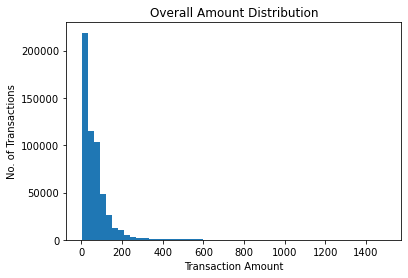

In [18]:
plt.hist(df[df['amt']<=1500]['amt'], bins=50)
plt.title('Overall Amount Distribution');

plt.xlabel('Transaction Amount')
plt.ylabel('No. of Transactions')

plt.show();

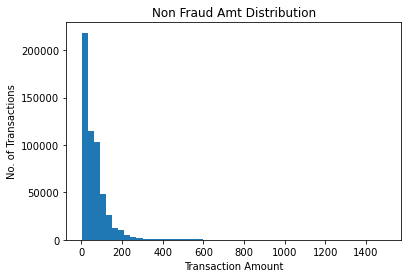

In [19]:
plt.hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'], bins=50)
plt.title('Non Fraud Amt Distribution');

plt.xlabel('Transaction Amount')
plt.ylabel('No. of Transactions')

plt.show();

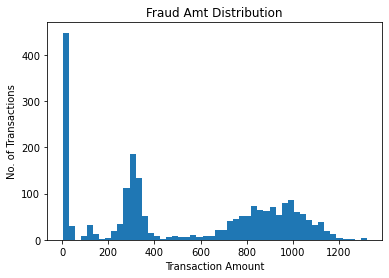

In [20]:
plt.hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=50)
plt.title('Fraud Amt Distribution')

plt.xlabel('Transaction Amount')
plt.ylabel('No. of Transactions')

plt.show();

<AxesSubplot:xlabel='amt'>

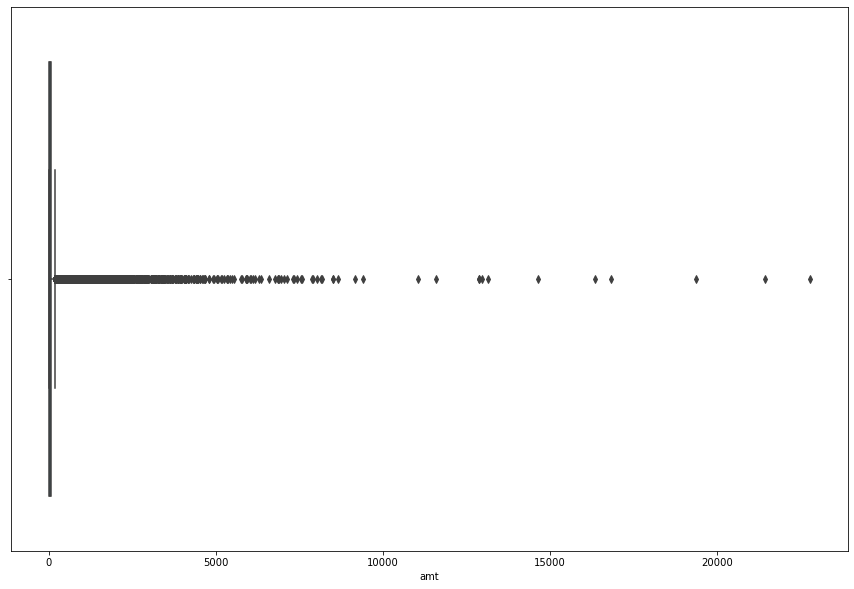

In [25]:
plt.figure(figsize=[15,10])
sns.boxplot(df['amt'])

<AxesSubplot:>

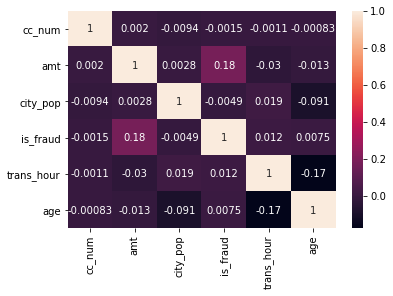

In [107]:
sns.heatmap(df.corr(), annot=True,)

## Treating outliers:

In [100]:
df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
is_fraud                          int64
trans_hour                        int64
day_of_week                      object
year_month                    period[M]
age                             float64
dtype: object

In [22]:
df100 = df.drop(['trans_date_trans_time', 'dob', 'year_month'], axis=1)

In [23]:
Q1 = df100.quantile(0.25)
Q3 = df100.quantile(0.75)

IQR = Q3 - Q1

find_outliers = ((df100 < (Q1 - 1.5*IQR)) | (df100 > (Q3 + 1.5*IQR))).any(axis = 1)

print(df100.shape)
print(df100[~find_outliers].shape)

df100 = df100[~find_outliers]

(555719, 23)
(377670, 23)


In [104]:
df.std()

trans_date_trans_time      60 days 04:45:04.065916182
cc_num                          1309836622980698624.0
amt                                        156.745941
city_pop                                300390.892061
dob                      6366 days 13:45:13.689843520
is_fraud                                     0.062008
trans_hour                                   6.810924
age                                         17.434172
dtype: object

## Dropping irrelevant columns:

In [26]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'day_of_week', 'year_month',
       'age'],
      dtype='object')

In [24]:
df.drop(columns=['zip', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long'], axis=1, inplace=True)

In [28]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'city_pop', 'job',
       'dob', 'trans_num', 'is_fraud', 'trans_hour', 'day_of_week',
       'year_month', 'age'],
      dtype='object')

#### Gender

In [25]:
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

,Gender,gender_count,percent
0,F,304886,54.863339
1,M,250833,45.136661


Females customers are higher than male

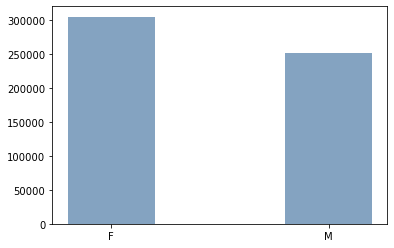

In [26]:
plt.bar(df_gender['Gender'], df_gender['gender_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [27]:
pd.crosstab(df['gender'], df['is_fraud'])

is_fraud,0,1
gender,,
F,303722,1164
M,249852,981


<AxesSubplot:xlabel='gender'>

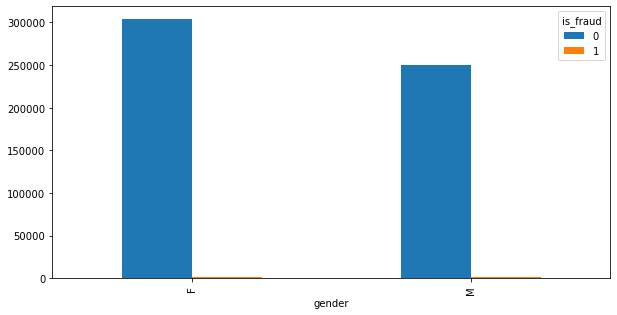

In [28]:
pd.crosstab(df['gender'], df['is_fraud']).plot(kind='bar', figsize=(10,5))

In [29]:
df_fraud_gender = df[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

,Gender,is_fraud,count,gender_count,percent_grp
0,F,0,303722,304886,99.618218
1,F,1,1164,304886,0.381782
2,M,0,249852,250833,99.608903
3,M,1,981,250833,0.391097


##### Category

In [30]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

,Category,category_count,percent
2,gas_transport,56370,10.143616
4,grocery_pos,52553,9.456758
6,home,52345,9.419329
12,shopping_pos,49791,8.959744
7,kids_pets,48692,8.761982
11,shopping_net,41779,7.518008
0,entertainment,40104,7.216597
10,personal_care,39327,7.076778
1,food_dining,39268,7.066161
5,health_fitness,36674,6.599378


Gas_transport holds for the maximum no.of the transactions 

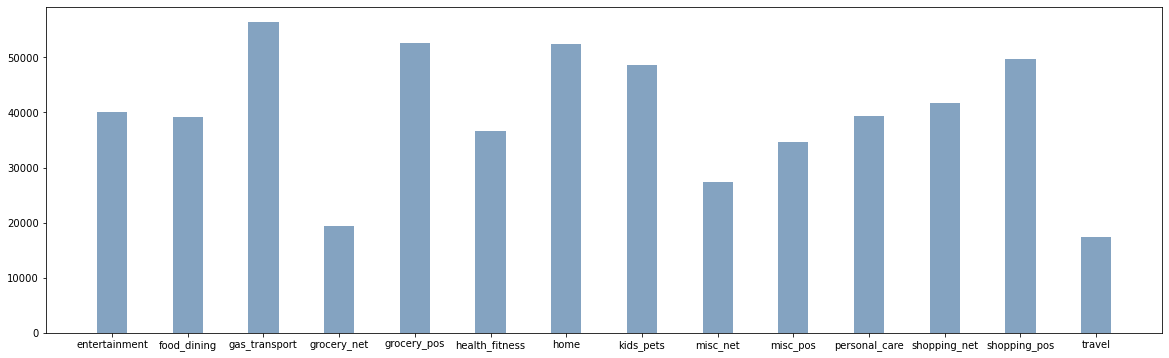

In [31]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_category['Category'], df_category['category_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [32]:
df_fraud_category = df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100


In [33]:
df_fraud_category.sort_values(by = ['count'], ascending=True)

,Category,is_fraud,count,category_count,percent,percent_grp
27,travel,1,40,17449,3.139896,0.229239
7,grocery_net,1,41,19426,3.495652,0.211057
11,health_fitness,1,52,36674,6.599378,0.141790
3,food_dining,1,54,39268,7.066161,0.137517
1,entertainment,1,59,40104,7.216597,0.147117
15,kids_pets,1,65,48692,8.761982,0.133492
13,home,1,67,52345,9.419329,0.127997
21,personal_care,1,70,39327,7.076778,0.177995
19,misc_pos,1,72,34574,6.221490,0.208249
5,gas_transport,1,154,56370,10.143616,0.273195


#### grocery_pos and shopping_net has more number of fraud transactions compared to other categories

In [34]:
df_fraud=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'])
df_fraud

,Category,is_fraud,count,category_count,percent,percent_grp
13,home,1,67,52345,9.419329,0.127997
15,kids_pets,1,65,48692,8.761982,0.133492
3,food_dining,1,54,39268,7.066161,0.137517
11,health_fitness,1,52,36674,6.599378,0.141790
1,entertainment,1,59,40104,7.216597,0.147117
21,personal_care,1,70,39327,7.076778,0.177995
19,misc_pos,1,72,34574,6.221490,0.208249
7,grocery_net,1,41,19426,3.495652,0.211057
27,travel,1,40,17449,3.139896,0.229239
5,gas_transport,1,154,56370,10.143616,0.273195


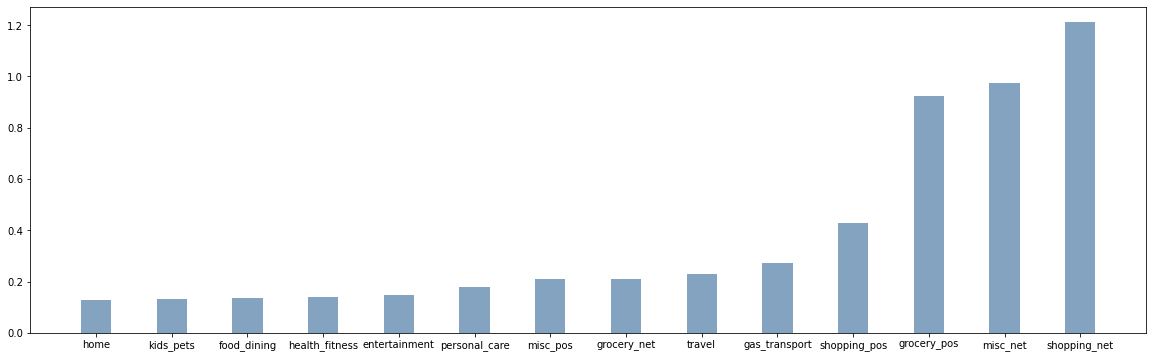

In [35]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_fraud['Category'] , df_fraud['percent_grp'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

### According to the percentage group, Shopping net and Misc_net have highest no. of fraud transactions.

##### Merchant

In [38]:
df.merchant.value_counts(normalize=True, ascending=False)

fraud_Kilback LLC                        0.003345
fraud_Cormier LLC                        0.002874
fraud_Schumm PLC                         0.002809
fraud_Kuhn LLC                           0.002737
fraud_Dickinson Ltd                      0.002733
                                           ...   
fraud_Treutel-King                       0.000581
fraud_Satterfield-Lowe                   0.000574
fraud_Kessler Group                      0.000572
fraud_Jerde-Hermann                      0.000561
fraud_Ritchie, Bradtke and Stiedemann    0.000547
Name: merchant, Length: 693, dtype: float64

In [36]:
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

,Merchant,merchant_count,percent
316,fraud_Kilback LLC,1859,0.334522
105,fraud_Cormier LLC,1597,0.287375
571,fraud_Schumm PLC,1561,0.280897
349,fraud_Kuhn LLC,1521,0.273699
136,fraud_Dickinson Ltd,1519,0.273340
...,...,...,...
633,fraud_Treutel-King,323,0.058123
544,fraud_Satterfield-Lowe,319,0.057403
306,fraud_Kessler Group,318,0.057223
286,fraud_Jerde-Hermann,312,0.056143


In [37]:
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [38]:
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False)

,Merchant,is_fraud,count,merchant_count,percent,percent_grp
957,"fraud_Romaguera, Cruickshank and Greenholt",1,18,828,0.148996,2.173913
703,fraud_Lemke-Gutmann,1,18,837,0.150616,2.150538
805,"fraud_Mosciski, Ziemann and Farrell",1,18,870,0.156554,2.068966
439,"fraud_Heathcote, Yost and Kertzmann",1,17,830,0.149356,2.048193
947,"fraud_Rodriguez, Yost and Jenkins",1,10,501,0.090153,1.996008
...,...,...,...,...,...,...
708,"fraud_Lind, Huel and McClure",1,1,1125,0.202440,0.088889
425,fraud_Harris Inc,1,1,1138,0.204780,0.087873
902,"fraud_Raynor, Feest and Miller",1,1,1152,0.207299,0.086806
994,"fraud_Schaefer, McGlynn and Bosco",1,1,1163,0.209278,0.085985


##### One Hot-Encoding

In [39]:
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='day_of_week', drop_first=True)

In [40]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

In [44]:
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,0,0,0,1,0,0,1,0,0,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,0,0,0,0,0,0,1,0,0,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,0,0,0,0,0,0,1,0,0,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,0,0,0,1,0,0,1,0,0,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,0,0,1,1,0,0,1,0,0,0


##### Test-Train Split

In [41]:
X_cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday']

Y_cols = ['is_fraud']

In [42]:
#Importing Library
from sklearn.model_selection import train_test_split

##### Oversampling

In [43]:
#As this dataset is highly imbalance we have to balance this by over sampling
cnt_non_fraud = df1[df1['is_fraud'] == 0]['amt'].count()
df1_class_fraud = df1[df1['is_fraud'] == 1]
df1_class_nonfraud = df1[df1['is_fraud'] == 0]

In [44]:
#OverSampling
df1_class_fraud_oversample = df1_class_fraud.sample(cnt_non_fraud, replace=True)
df1_oversampled = pd.concat([df1_class_nonfraud, df1_class_fraud_oversample], axis=0)

print('Random over-sampling:')
print(df1_oversampled['is_fraud'].value_counts())

Random over-sampling:
0    553574
1    553574
Name: is_fraud, dtype: int64


In [64]:
df1_oversampled.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,0,0,0,1,0,0,1,0,0,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,0,0,0,0,0,0,1,0,0,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,0,0,0,0,0,0,1,0,0,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,0,0,0,1,0,0,1,0,0,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,0,0,1,1,0,0,1,0,0,0


####  Train and test split

In [45]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df1_oversampled[X_cols],df1_oversampled[Y_cols] , train_size=0.7, test_size=0.3, random_state=42)

In [71]:
X_train.shape

(775003, 24)

In [72]:
X_test.shape

(332145, 24)

#### Logistic Regression

In [46]:
#Importing Library
from sklearn.linear_model import LogisticRegression

In [47]:
logreg = LogisticRegression(random_state=42)

In [48]:
#Building Logistic Regression  Model

logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [49]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[359569  28016]
 [ 98995 288423]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85    387585
           1       0.91      0.74      0.82    387418

    accuracy                           0.84    775003
   macro avg       0.85      0.84      0.83    775003
weighted avg       0.85      0.84      0.83    775003



In [52]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[153897  12092]
 [ 42383 123773]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85    165989
           1       0.91      0.74      0.82    166156

    accuracy                           0.84    332145
   macro avg       0.85      0.84      0.83    332145
weighted avg       0.85      0.84      0.83    332145



##### Logistic Regression model results:

Training data: 

Accuracy - 85%

recall   - 84%

Testing data:

Accuracy - 85%

recall   - 84%